In [1]:
import numpy as np
from numpy import sin, cos, pi, exp, log10, log2, sqrt
from numpy import linspace, meshgrid, angle, arccos, abs
from numpy import max, min, sum, zeros, hanning, hamming, blackman
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colors
import scipy.integrate as integrate
from scipy.integrate import simps


In [8]:
def cart2sph(x,y,z):
    phi = angle(x+1j*y)
    r = abs(z + 1j*abs(x+1j*y))
    theta = arccos(z/r)
    return r, theta, phi
def sph2cart(r, th, ph):
    x = r*sin(th)*cos(ph)
    y = r*sin(th)*sin(ph)
    z = r*cos(th)
    return x, y, z

def cartvec2sph(vi, vj, vk, th, ph):
    vr = vi*sin(th)*cos(ph) + vj*sin(th)*sin(ph) + vk*cos(th)
    vt = vi*cos(th)*cos(ph) + vj*cos(th)*sin(ph) - vk*sin(th)
    vk = -vi*sin(ph) + vj*cos(ph)
    return vr, vt, vk
def sphvec2cart(vr, vt, vp, th, ph):
    vx = vr*sin(th)*cos(ph)+vt*cos(th)*cos(ph)-sin(ph)*vp
    vy = vr*sin(th)*sin(ph)+vt*cos(th)*sin(ph)+cos(ph)*vp
    vz = vr*cos(th)-vt*sin(th)
    return vx, vy, vz

def dist(r, th, ph, r0, th0, ph0):
    x, y, z = sph2cart(r,th,ph)
    x0, y0, z0 = sph2cart(r0,th0,ph0)
    return sqrt((x-x0)**2+(y-y0)**2+(z-z0)**2)

def cross(xi, xj, xk, yi, yj, yk):
    zi = xj*yk-xk*yj
    zj = xk*yi-xi*yk
    zk = xi*yj-xj*yi
    return zi, zj, zk

def dot(xi, xj, xk, yi, yj, yk):
    return xi*yi+xj*yj+xk*yk

In [3]:
Er = lambda q, r, th, ph, r0, th0, ph0: q/4/pi/dist(r, th, ph, r0, th0, ph0)**2
Et = lambda q, r, th, ph, r0, th0, ph0: 0
Ep = lambda q, r, th, ph, r0, th0, ph0: 0
Br = lambda q, r, th, ph, r0, th0, ph0: 0
Bt = lambda q, r, th, ph, r0, th0, ph0: 0
Bp = lambda q, r, th, ph, r0, th0, ph0: 0

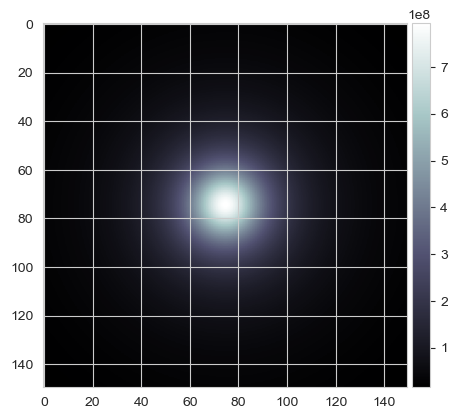

In [12]:
_lambda = 10e-6
eps0 = 8.85e-12
mu0 = 4*pi*1e-7
c = 1/sqrt(eps0*mu0)
q = 1
x = linspace(-5*_lambda, 5*_lambda, 150)
y = linspace(-5*_lambda, 5*_lambda, 150)
Xm, Ym = np.meshgrid(x, y)
r, th, ph = cart2sph(Xm, Ym, 0)
r0, th0, ph0 = 1*_lambda, 0, 0
[ex, ey, ez] = sphvec2cart(Er(q, r, th, ph, r0, th0, ph0), Et(q, r, th, ph, r0, th0, ph0), Ep(q, r, th, ph, r0, th0, ph0), th, ph)
[bx, by, bz] = sphvec2cart(Br(q, r, th, ph, r0, th0, ph0), Bt(q, r, th, ph, r0, th0, ph0), Bp(q, r, th, ph, r0, th0, ph0), th, ph)

#plt.quiver(Xm, Ym, ex, ey, units='width', pivot='mid');
er = Er(q, r, th, ph, r0, th0, ph0)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(er, cmap='bone')
fig.colorbar(im, cax=cax, orientation='vertical')


In [36]:
def em_fields_rel(ex, ey, ez, bx, by, bz, beta):
    gamma = 1/np.sqrt(1-(np.linalg.norm(beta_v))**2)
    print(gamma)
    b_X_beta = cross(bx, by, bz, beta[0], beta[1], beta[2])
    e_X_beta = cross(ex, ey, ez, beta[0], beta[1], beta[2])
    e_D_beta = dot(ex, ey, ez, beta[0], beta[1], beta[2])
    b_D_beta = dot(bx, by, bz, beta[0], beta[1], beta[2])
    ex_p = gamma*ex - gamma*b_X_beta[0] - gamma**2/(gamma+1)*beta[0]*e_D_beta 
    ey_p = gamma*ey - gamma*b_X_beta[1] - gamma**2/(gamma+1)*beta[1]*e_D_beta
    ez_p = gamma*ez - gamma*b_X_beta[2] - gamma**2/(gamma+1)*beta[2]*e_D_beta 
    bx_p = gamma*bx + gamma*e_X_beta[0] - gamma**2/(gamma+1)*beta[0]*b_D_beta 
    by_p = gamma*by + gamma*e_X_beta[1] - gamma**2/(gamma+1)*beta[1]*b_D_beta
    bz_p = gamma*bz + gamma*e_X_beta[2] - gamma**2/(gamma+1)*beta[2]*b_D_beta
    return ex_p, ey_p, ez_p, bx_p, by_p, bz_p
        

1.25
1.25


C:\Users\morae\AppData\Local\Temp\ipykernel_18580\1092491935.py:4: RuntimeWarning: invalid value encountered in divide
  theta = arccos(z/r)


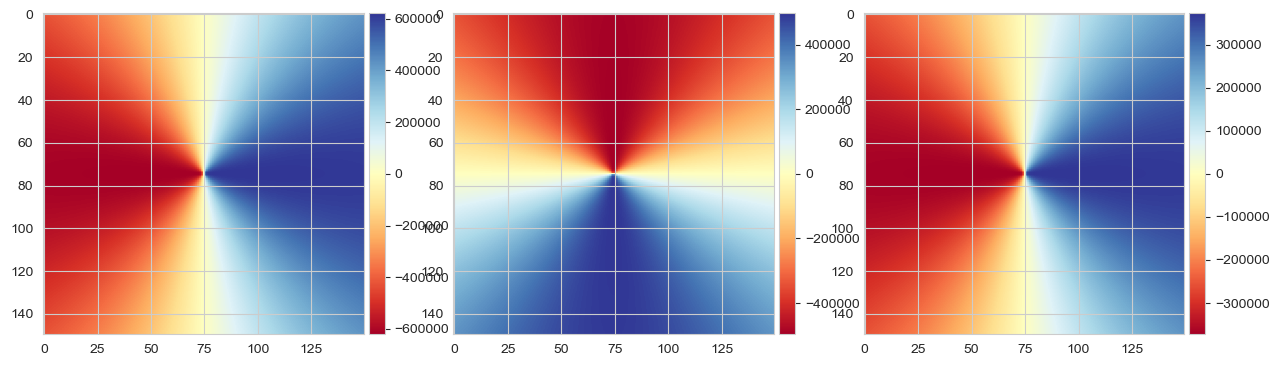

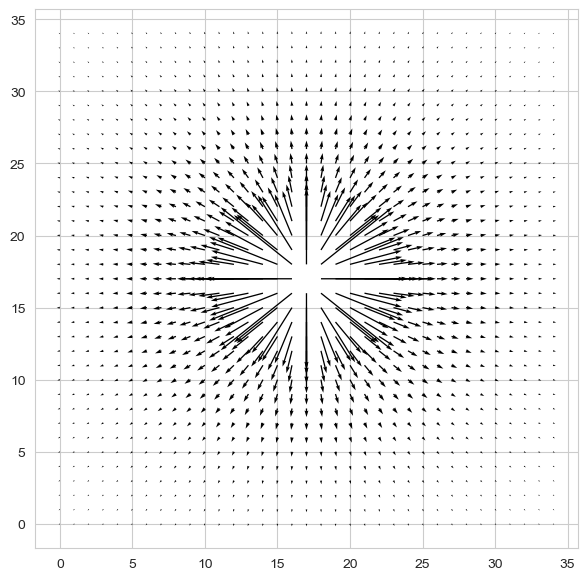

In [68]:
beta_v = [0, c*0.6/c, 0]
_lambda = 10e-6
eps0 = 8.85e-12
mu0 = 4*pi*1e-7
c = 1/sqrt(eps0*mu0)
q = 1
x = linspace(-5*_lambda, 5*_lambda, 150)
y = linspace(-5*_lambda, 5*_lambda, 150)
Xm, Ym = np.meshgrid(x, y)
r, th, ph = cart2sph(Xm, Ym, 0)
r0, th0, ph0 = 40*_lambda, 0, 0
[ex, ey, ez] = sphvec2cart(Er(q, r, th, ph, r0, th0, ph0), Et(q, r, th, ph, r0, th0, ph0), Ep(q, r, th, ph, r0, th0, ph0), th, ph)
[bx, by, bz] = sphvec2cart(Br(q, r, th, ph, r0, th0, ph0), Bt(q, r, th, ph, r0, th0, ph0), Bp(q, r, th, ph, r0, th0, ph0), th, ph)
ex_p, ey_p, ez_p, bx_p, by_p, bz_p = em_fields_rel(ex, ey, ez, bx, by, bz, beta_v)
er_p, et_p, ep_p = cartvec2sph(ex_p, ey_p, ez_p, th, ph) 
norm_e = np.sqrt(np.abs(ex)**2+np.abs(ey)**2+np.abs(ez)**2)
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
divider, cax = [0]*len(axis), [0]*len(axis)
for ax_ind, ax in enumerate(axis): 
    divider[ax_ind] = make_axes_locatable(ax)
    cax[ax_ind] = divider[ax_ind].append_axes('right', size='5%', pad=0.05)
    data = ex_p*(ax_ind==0) + ey_p*(ax_ind==1) + bz_p*(ax_ind==2)
    im = ax.imshow(data, cmap='RdYlBu')
    fig.colorbar(im, cax=cax[ax_ind], orientation='vertical')

x = linspace(-25*_lambda, 25*_lambda, 35)
y = linspace(-25*_lambda, 25*_lambda, 35)
Xm_q, Ym_q = np.meshgrid(x, y)
r, th, ph = cart2sph(Xm_q, Ym_q, 0)
r0, th0, ph0 = 4*_lambda, 0, 0
[ex, ey, ez] = sphvec2cart(Er(q, r, th, ph, r0, th0, ph0), Et(q, r, th, ph, r0, th0, ph0), Ep(q, r, th, ph, r0, th0, ph0), th, ph)
[bx, by, bz] = sphvec2cart(Br(q, r, th, ph, r0, th0, ph0), Bt(q, r, th, ph, r0, th0, ph0), Bp(q, r, th, ph, r0, th0, ph0), th, ph)
ex_p, ey_p, ez_p, bx_p, by_p, bz_p = em_fields_rel(ex, ey, ez, bx, by, bz, beta_v)
fig, axis = plt.subplots(1, 1, figsize=(7, 7))
axis.quiver(ex_p, ey_p)

